

> **Breast Cancer Classification using Neural Networks**










An abnormal mass of tissue that forms when cells grow and divide more than they should or do not die when they should are called as Tumors. 

Tumors may be Benign (not cancer) or Malignant (cancer). 

Benign tumors may grow large but do not spread into, or invade, nearby tissues or other parts of the body. 

Malignant tumors can spread into, or invade, nearby tissues.

So,in this project we had made a neural network to classify the tumors into Benign or Malignant, and based on that further treatments has to be taken or not will be decided .

If the tumor is Benign then there is nothing to worry about and if it the tumor is Malignant then they has to be given immediate treatment to remove that particulare tumor.

Now, as we are known about the basic information or domain knowledge we will go further with making a predictive system for the same.

**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

**Loading the data**

In [ ]:
# loading the breast cancer dataset from csv file to pandas data frame
df = pd.read_csv('/content/data.csv')

**Exploratory Data analysis (EDA)**

In [ ]:
# printing the first five rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From this we came to know that:

1-Our diagnosis column is in object format or categorical format and remaining are in numeric format.

2-There are total 569 records and all of them are not null which means there are no missing values present in any column and overall 33 columns in our dataframe.

3-From basic understanding of data we can say that values of id column is not so important to classify our output as Benign and Malignant.So we can drop this particular column.

4-The Unnamed:32 column has 0 records due to which we are having NaN values in that column so we can also drop this particular column.



In [ ]:
# removing the unnamed column
df.drop(columns='Unnamed: 32', axis = 1, inplace=True)

In [ ]:
# removing the id column
df.drop(columns='id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

After dropping two columns of id and unnamed column now we have overall 31 columns present in our dataframe

In [ ]:
# another way for checking missing values 
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

From these we can see that there are no missing values present in the data.

**Checking for descriptive information**


In [ ]:
df.describe() #This function will only consider numeric column for statistical descprition.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


-From this we can say:



 

  

*   Count: This basically counts the number of records in each column.



*   mean: Its calculating mean value or average value for every column by sum of every values divided by total number of values.

*  std: Calculates standard deviation value for each column it basically tells us what is the difference between each value and difference between mean value.



* min: It will give minimum value of each columns




* 25%: It calculates 25 percentile it says that how many values are below this particular point. for eg 25% value lies below 11.700 in radius_mean and similarly for each and every column.


*   50% and 75%: Similarly like 25% we can also conclude 50% (Median: middle value) and 75% for each and every column.
50% is calculated by sorting the data in ascending order and by extracting the middle value of that particular data.
*   max: It will give us the maximum value of each column.

-We can also say for some features mean value is greater than the median value, So when our mean value is greater than the median value in that case we can say our data is right skewed data.













**Checking the distribution of target Variable**

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

-We can see that there are total 357 records of Benign and 212 records of Malignant. 

-Data is slightly imbalance which will not majorly effect our prediction.

**Label Encoding the diagonis column to convert the column in numeric as it is object format.**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
df["diagnosis"].unique()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Here after label encoding we have,

Benign --> 0 and Malignant --> 1

**Grouping the data based on the diagnosis**

In [ ]:
df.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


We can clearly see that for most of the features, the mean values are higher for Malignant(1) cases and lower for Benign(0) cases.

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
# number of rows and columns in the dataset
df.shape

(569, 31)

From this we can conclude that there are 569 rows and 31 columns in our data

**Seperating Dependent and Independent Features**

In [ ]:
x = df.drop(columns='diagnosis', axis=1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y=df["diagnosis"]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**Splitting the data into training and testing**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, xtrain.shape, xtest.shape)

(569, 30) (455, 30) (114, 30)


**Standardizing the data**

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_std = sc.fit_transform(xtrain)
xtest_std = sc.transform(xtest)


In [ ]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3) # wehenever we train a neural network there are several weights and parameters that will be initialised and our accuracy will also changed in  each epochs to keep the accuracy same we set this random seed. 
from tensorflow import keras

In [ ]:
# setting up the layers of Neural Network


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')])

# 1st layer is input layer where  we use flatten to convert into a single dimensional array.
# 2nd layer is hidden layer where we use relu as an activation function and 20 neurons.
# 3rd layer is output layer we use 2 neuron as we need to classify in two classes Benign and Malignant and activation function used is sigmoid

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

history = model.fit(xtrain_std, ytrain, validation_split=0.1, epochs=10)


Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.7982 - accuracy: 0.4352 - val_loss: 0.5526 - val_accuracy: 0.6957
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.7188 - val_loss: 0.3843 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.8509 - val_loss: 0.2907 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.8924 - val_loss: 0.2347 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2680 - accuracy: 0.9144 - val_loss: 0.2011 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.9340 - val_loss: 0.1785 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9462 - val_loss: 0.1626 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

From here we can see that accuracy starts from 0.43 i.e. 43% to 0.94 i.e. 94%.

Here loss function is difference between true value and predicted value
and the value of this loss function should be minimum.

Also we can conclude that as the loss function decreases accuracy increases at each epoch which means that loss function and accuracy is inversely proportional to each other.


**Visualizing accuracy and loss**

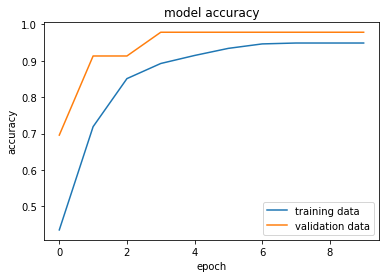

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

It will take each values of accuracy and val_accuracy and it will try to plot it.

Here the blue color line tells us how the training data accuracy changes from 43% to 94%.

And the orange color line tells us how is the validation accuracy changes from 69% to 97%.

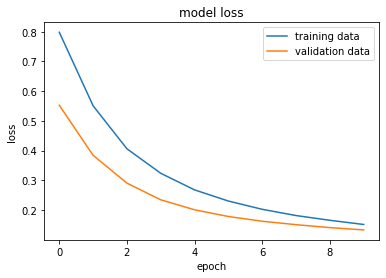

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

It will take each values of loss and val_loss and it will try to plot it.

In the 1st epoch the loss function value is 0.79 and decreases to 0.15 at the last epoch

Aswell as at the 1st epoch val_loss is 0.55 and decreases to 0.13 at the last epoch

**So the final accuracy that we are getting for training data 0.94 is and validation data is 0.97**

**Accuracy of the model on test data**

In [ ]:
loss, accuracy = model.evaluate(xtest_std, ytest)
print("The accuracy for model is ",accuracy)
print("The loss  for model is ",loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.1828 - accuracy: 0.9474
The accuracy for model is  0.9473684430122375
The loss  for model is  0.18277963995933533


This is just like predicting the accuracy score which we used to do in machine learning.

Here we feed the xtest_std so the neural network will predict the label for all this test data and it will compare with the ytest.



In [ ]:
print(xtest_std.shape)
print(xtest_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


Here we have 114 data points and 30 columns.
and the 1st value of all 30 columns is displayed 

In [ ]:
Ypred = model.predict(xtest_std)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(Ypred.shape)
print(Ypred[0])

(114, 2)
[0.364736   0.33009553]


From this we get two values for 1 datapoint .
So the 1st value give us probabilty that value is 0 and the 2nd values give us the probabilty that the value is 1. 
 

From this two values we select the maximum value to predict the datapoint which means if 1st value is maximum we will chose 0 and if 2nd value is maximum we will chose 1 (Benign --> 0 and Malignant --> 1).

In [ ]:
print(xtest_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


This our Xtest standardised data with 114 data points

In [ ]:
print(Ypred)

[[3.6473599e-01 3.3009553e-01]
 [4.8511094e-01 3.6018535e-01]
 [3.2784167e-01 4.3890928e-03]
 [1.2566350e-04 9.8853046e-01]
 [4.2934784e-01 4.0828571e-01]
 [1.3700943e-02 9.0191799e-01]
 [3.3376735e-01 1.6635957e-01]
 [4.1174772e-01 1.4704477e-02]
 [4.0930668e-01 4.9457788e-02]
 [4.3685910e-01 3.2757547e-02]
 [4.0557447e-01 2.0085137e-01]
 [3.3541662e-01 2.1568097e-02]
 [3.6567459e-01 1.1763926e-01]
 [4.2548490e-01 1.2884076e-01]
 [4.3117762e-01 2.1253899e-02]
 [2.1163581e-02 7.0743984e-01]
 [3.3799937e-01 8.2017025e-03]
 [4.4709921e-01 4.4798966e-02]
 [4.7835904e-01 2.2420289e-02]
 [5.4916572e-02 8.7536925e-01]
 [4.5153379e-02 2.2903065e-01]
 [3.5851508e-01 8.2428353e-03]
 [3.3676234e-01 1.9918161e-02]
 [3.6269683e-01 7.6896087e-03]
 [4.6683350e-01 1.2551470e-01]
 [7.2689489e-02 7.9598242e-01]
 [5.3160757e-01 7.7938892e-02]
 [5.5307120e-01 3.2255104e-01]
 [7.1026191e-02 6.5878087e-01]
 [4.2083740e-02 6.8603843e-01]
 [2.4606866e-01 4.2132959e-02]
 [3.0541542e-01 5.3906448e-02]
 [4.9717

This Ypred data gives us 114 values and for each value we will be having two more values, and from that it will compare both values and and will chose the maximum value and based on that  it will give the value 0 and 1.

model.predict() gives the prediction probability of each class for that data point

In [ ]:
#  argmax function used to convert the prediction probabilty to class labels

#for 1 datapoint

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
# converting the prediction probability to class labels

#for all data points in Ypred

Y_pred_labels = [np.argmax(i) for i in Ypred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


Building the predictive system

In [ ]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = sc.transform(input_data_reshaped)

#the prediction probability of each class for that data point
prediction = model.predict(input_data_std)
print(prediction)

#convert the prediction probabilty to class labels
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Benign')

else:
  print('The tumor is Malignant')

1/1 [==============================] - 0s 20ms/step
[[0.2881063  0.00582106]]
[0]
The tumor is Benign
